<a href="https://colab.research.google.com/github/bmijangos/ProyectoIntegrador/blob/main/Pruebas_Produccion_Equipo21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tecnológico de Monterrey**

# **Proyecto Integrador**
## Pruebas en produccion
## Modelo Final
###Dra. Grettel Barceló Alonso
###EQUIPO 21
###Bernardo Mijango Flores - A01793654
###Dalia Isabel López Tapia - A01245026
###David Valles Canedo - A01191310
2 de junio de 2024

# Importaciones, Funciones, Dependencias y Pasos Iniciales

In [ ]:
# conectamos al drive de google para la lectura de los archivos csv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns   # para un mejor despliegue de los gráficos

from sklearn.model_selection import train_test_split

# Lectura de los datos

Se realizo una corrección en la consulta de la base de datos para obtener la edad del cliente al momento del desembolso del crédito, en el avance 1 nos dimos cuenta de este error, además se agregaron los castigos en el mismo archivo dando un total de 4,382,214 registros resultado de los 4,254,537 del archivo de pagos mas 127,677 del archivo de castigos

In [ ]:
# Lectura de los archivos csv
#file_path = '/content/drive/MyDrive/DataSetProyecto/GrupalTodoCorregido.csv'

# Lectura del archivo
file_path = 'D:\Descargas\ProyectoIntegrador\DataSet\GrupalTodoCorregido.csv'

label = ["IdCliente","FechaAltaCliente","CodigoGrupo","EdadCliente","Genero","EstadoCivil","Escolaridad","CapacidadPago","Localidad","CodigoSucursal","CodigoASesor","NumeroCredito","CicloCliente","FechaDesembolso","FechaVencimiento","FechaCancelacion","Plazo","PeriodoPago","EstatusCredito","MontoCredito","CuotaNumero","CuotaFechaVencimiento","CuotaFechaCancelacion","MontoCuota","MontoCapital","SaldoCapital","EstatusCuota","DiasAtraso"]

# Obtenemos el dataframe
grupal_df = pd.read_csv(file_path, names=label)

grupal_df.shape

(4382214, 28)

Text(0.5, 1.0, 'Proporcion de datos faltantes por variable')

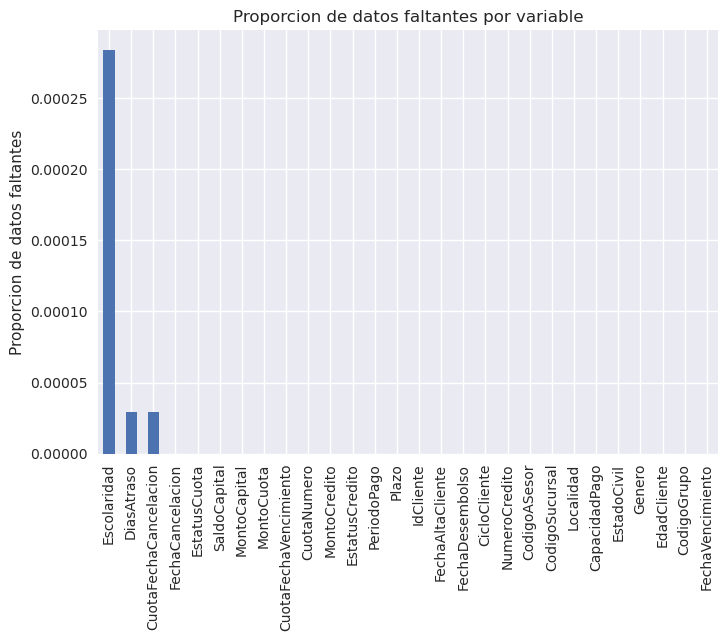

In [ ]:
# visualizamos la proporcion de los datos faltantes

with plt.style.context("seaborn"):
  grupal_df.isnull().mean().sort_values(ascending=False).plot.bar(rot=90)

plt.ylabel("Proporcion de datos faltantes")
plt.title("Proporcion de datos faltantes por variable")


Al ser un procentaje menor al 0.028 % se decide eliminarlos de la muestra

In [ ]:
# eliminamos los valores nulos
gpdf = grupal_df.dropna()

In [ ]:
gpdf.isnull().values.any()

False

In [ ]:
# Reemplazamos los valores negativos de la variable DiasAtraso por 0 ya que son pagos anticipados
gpdf.loc[gpdf['DiasAtraso'] < 1,'DiasAtraso'] = 0


In [ ]:
gpdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380844 entries, 0 to 4382213
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   IdCliente              int64  
 1   FechaAltaCliente       object 
 2   CodigoGrupo            int64  
 3   EdadCliente            int64  
 4   Genero                 object 
 5   EstadoCivil            int64  
 6   Escolaridad            object 
 7   CapacidadPago          float64
 8   Localidad              int64  
 9   CodigoSucursal         int64  
 10  CodigoASesor           object 
 11  NumeroCredito          int64  
 12  CicloCliente           int64  
 13  FechaDesembolso        object 
 14  FechaVencimiento       object 
 15  FechaCancelacion       object 
 16  Plazo                  int64  
 17  PeriodoPago            object 
 18  EstatusCredito         object 
 19  MontoCredito           float64
 20  CuotaNumero            int64  
 21  CuotaFechaVencimiento  object 
 22  CuotaFechaCancelacion  

### Se agregan los valores Maximos de dias de atraso por credito, la cuota del maximo dia de atraso y el porcentaje de credito pagado.

In [ ]:
# obtenemos el Maximo Dias de Atraso y las siguientes variables numericas
gpmdadf = gpdf.groupby(['IdCliente','EdadCliente','NumeroCredito','PeriodoPago','CicloCliente','Plazo','EstadoCivil','EstatusCredito'])['DiasAtraso'].max().reset_index()

# renombramos la columna de la media
gpmdadf.rename(columns={'DiasAtraso':'DAMax'}, inplace=True)

gpmdadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380284 entries, 0 to 380283
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   IdCliente       380284 non-null  int64  
 1   EdadCliente     380284 non-null  int64  
 2   NumeroCredito   380284 non-null  int64  
 3   PeriodoPago     380284 non-null  object 
 4   CicloCliente    380284 non-null  int64  
 5   Plazo           380284 non-null  int64  
 6   EstadoCivil     380284 non-null  int64  
 7   EstatusCredito  380284 non-null  object 
 8   DAMax           380284 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 26.1+ MB


Se obtiene la media y la mediana de los dias de atraso por credito y por cliente

In [ ]:
# obtenemos media de los Dias de Atraso por credito
gpmeandf = gpdf.groupby(['IdCliente','NumeroCredito'])['DiasAtraso'].mean().reset_index()

# obtenemos mediana de los Dias de Atraso por credito
gpmediandf = gpdf.groupby(['IdCliente','NumeroCredito'])['DiasAtraso'].median().reset_index()

# renombramos la columna de la media
gpmeandf.rename(columns={'DiasAtraso':'DAMean'}, inplace=True)

# renombramos la columna de la mediana
gpmediandf.rename(columns={'DiasAtraso':'DAMedian'}, inplace=True)


In [ ]:
# agregamos la columan de la media
newgpdf = pd.merge(gpmdadf, gpmeandf[['IdCliente','NumeroCredito','DAMean']], on=['IdCliente','NumeroCredito'], how='left')

# agregamos la columna de la mediana
newgpdf = pd.merge(newgpdf, gpmediandf[['IdCliente','NumeroCredito','DAMedian']], on=['IdCliente','NumeroCredito'], how='left')

In [ ]:
newgpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380284 entries, 0 to 380283
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   IdCliente       380284 non-null  int64  
 1   EdadCliente     380284 non-null  int64  
 2   NumeroCredito   380284 non-null  int64  
 3   PeriodoPago     380284 non-null  object 
 4   CicloCliente    380284 non-null  int64  
 5   Plazo           380284 non-null  int64  
 6   EstadoCivil     380284 non-null  int64  
 7   EstatusCredito  380284 non-null  object 
 8   DAMax           380284 non-null  float64
 9   DAMean          380284 non-null  float64
 10  DAMedian        380284 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 31.9+ MB


In [ ]:
newgpdf.head()

,IdCliente,EdadCliente,NumeroCredito,PeriodoPago,CicloCliente,Plazo,EstadoCivil,EstatusCredito,DAMax,DAMean,DAMedian
0,4,65,1000353601,CATORCENA(S),1,15,4,CAN,2.0,0.266667,0.0
1,6,34,1000539201,CATORCENA(S),1,15,5,CAN,0.0,0.000000,0.0
2,6,34,1000619301,CATORCENA(S),2,15,5,CAN,2.0,0.333333,0.0
3,6,35,1000696601,CATORCENA(S),3,15,5,CAN,2.0,0.466667,0.0
4,6,36,1000835501,CATORCENA(S),4,25,5,CAN,185.0,23.400000,1.0


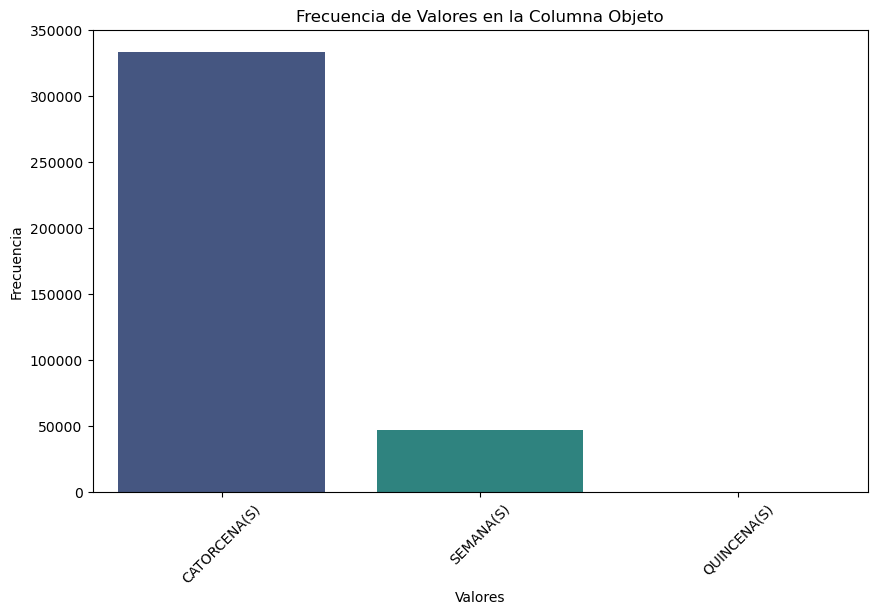

In [ ]:
# Calcular la frecuencia de la variable de tipo objeto
frc = newgpdf['PeriodoPago'].value_counts()

# Graficar el resultado
plt.figure(figsize=(10, 6))
sns.barplot(x=frc.index, y=frc.values, palette='viridis')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Valores en la Columna Objeto')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# seleccionamos las columnas del nuevo dataframe
columnas = ['IdCliente','NumeroCredito','EdadCliente','CicloCliente','Plazo','EstadoCivil','DAMax','DAMean','EstatusCredito']

# filtramos solo los creditos CATORCENA(S)
newdf = newgpdf[newgpdf['PeriodoPago']=='CATORCENA(S)'][columnas]

# mostramos el valor del nuevo dataframe
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333343 entries, 0 to 380283
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   IdCliente       333343 non-null  int64  
 1   NumeroCredito   333343 non-null  int64  
 2   EdadCliente     333343 non-null  int64  
 3   CicloCliente    333343 non-null  int64  
 4   Plazo           333343 non-null  int64  
 5   EstadoCivil     333343 non-null  int64  
 6   DAMax           333343 non-null  float64
 7   DAMean          333343 non-null  float64
 8   EstatusCredito  333343 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 25.4+ MB


# Avance 4


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import time

### Preprocesamiento de variables:

Mapeo y división de datos, convertimos la columna "EstatusCredito" en valores numéricos, dondel 'CAI' es '0' y 'CAN' es '1', se divide los datos en conjunto de entrenamiento del 80% y prueba del 20%

In [ ]:
# Definir la variable objetivo y las características
newdf['EstatusCredito'] = newdf['EstatusCredito'].map({'CAI': 0, 'CAN': 1})
X = newdf.drop('EstatusCredito', axis=1)  # Todas las columnas excepto 'EstatusCredito' son características independientes
y = newdf['EstatusCredito']  # 'EstatusCredito' es la variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento (X):", X_train.shape)
print("Dimensiones del conjunto de prueba (X):", X_test.shape)
print("Dimensiones del conjunto de entrenamiento (y):", y_train.shape)
print("Dimensiones del conjunto de prueba (y):", y_test.shape)

Dimensiones del conjunto de entrenamiento (X): (266674, 8)
Dimensiones del conjunto de prueba (X): (66669, 8)
Dimensiones del conjunto de entrenamiento (y): (266674,)
Dimensiones del conjunto de prueba (y): (66669,)


### Definición de Pipelines para Transformaciones:

Se aplica una transformación logarítmica y un escalado Min-Max a las columnas númericas, se aplica codifiación One-Hot a las columnas categóricas, se dejan algunas columnas sin transformación y por ultimo se combina todas las transformaciones en un solo tranformador

In [ ]:
# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:

# Variables numéricas:
num_pipe = Pipeline([
    ('log_transform', FunctionTransformer(np.log1p)),  # Transformación logarítmica
    ('min_max_scaler', MinMaxScaler())  # Escalado Min-Max
])
num_pipe_nombres = ['DAMax', 'DAMean', 'EdadCliente','CicloCliente', 'Plazo']

# Variables categóricas:
cat_pipe = Pipeline([
    ('one_hot_encoding', OneHotEncoder())  # Codificación One-Hot
])
cat_pipe_nombres = [ 'EstadoCivil']


# Variables sin transformar:
no_trans_pipe = 'passthrough'
no_trans_nombres = ['IdCliente', 'NumeroCredito']

# Conjuntemos las transformaciones de todo tipo de variable y en dado caso
# deja inalteradas aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer([
    ('num', num_pipe, num_pipe_nombres),  # Variables numéricas
    ('cat', cat_pipe, cat_pipe_nombres),  # Variables categóricas
    ('notrans', no_trans_pipe, no_trans_nombres)  # Variables sin tranformar
])


Juntamos los conjuntos de entrenamiento y prueba en un solo conjunto para realizar validación cruzada

In [ ]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo aumentado que llamaremos trainval para utilizar como entrenamiento:

# Concatenar los conjuntos de entrenamiento y validación
Xtrainval = pd.concat([X_train, X_test], ignore_index=True)
ytrainval = pd.concat([y_train, y_test], ignore_index=True)

# Mostrar las dimensiones del nuevo conjunto trainval
print(Xtrainval.shape, ytrainval.shape)

(333343, 8) (333343,)


### Construir al menos 6 modelos diferentes, utilizando algoritmos variados.

In [ ]:
def mis_modelos():
  modelos, nombres = list(), list()

  # Regresión Logística:
  modelos.append(LogisticRegression(max_iter=10000, random_state=15, solver='lbfgs'))
  nombres.append('LR')

  # k-Vecinos más Cercanos:
  modelos.append(KNeighborsClassifier(n_neighbors=10, weights='distance'))
  nombres.append('kNN')

  # Árbol de decisiones:
  modelos.append(DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=15))
  nombres.append('DTree')

  # XGBoosting:
  modelos.append(XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=15))
  nombres.append('XGBoost')

  # Red neuronal de Perceptrón Multicapa:
  modelos.append(MLPClassifier(max_iter=10000, hidden_layer_sizes=(100,50), activation='relu', random_state=15))
  nombres.append('MLP')

  # Random Forest:
  modelos.append(RandomForestClassifier(n_estimators=100, random_state=15))
  nombres.append('RandomForest')

  return modelos, nombres

### Evaluación de las métricas durante el proceso de validación cruzada

* Training time: El tiempo total que tomó entrenar el
modelo.
* test_f1 y train_f1: El valor F1, que es la media armónica de la precisión y el recall, tanto en el conjunto de prueba como en el conjunto de entrenamiento.
* test_roc_auc y train_roc_auc: El área bajo la curva ROC, que mide la capacidad del modelo para distinguir entre las clases.
* test_precision y train_precision: La precisión, que es el número de verdaderos positivos dividido por el número de verdaderos positivos más los falsos positivos.
* test_accuracy y train_accuracy: La precisión global del modelo, que es el número de predicciones correctas dividido por el número total de predicciones.
* test_recall y train_recall: El recall, que es el número de verdaderos positivos dividido por el número de verdaderos positivos más los falsos negativos.

In [ ]:
#Entrenemos cada uno de los modelos y desplegamos la métricas de Train y Val.

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  #
  #
  # TODO: ('ct',columnasTransformer),
  pipeline = Pipeline(steps=[('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Iniciamos timer
  start_time = time.time()

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Detenemos el temporizador
  end_time = time.time()

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  print('\t Training time: %.3f seconds' % (end_time - start_time))
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

>> LR
	 Training time: 30.171 seconds
	 test_precision 0.968 (0.000)
	 train_precision 0.968 (0.000)
	 test_f1 0.984 (0.000)
	 train_f1 0.984 (0.000)
	 test_recall 1.000 (0.000)
	 train_recall 1.000 (0.000)
	 test_accuracy 0.968 (0.000)
	 train_accuracy 0.968 (0.000)
	 test_roc_auc 0.330 (0.006)
	 train_roc_auc 0.330 (0.002)
>> kNN
	 Training time: 162.876 seconds
	 test_precision 0.987 (0.000)
	 train_precision 1.000 (0.000)
	 test_f1 0.992 (0.000)
	 train_f1 1.000 (0.000)
	 test_recall 0.997 (0.000)
	 train_recall 1.000 (0.000)
	 test_accuracy 0.984 (0.001)
	 train_accuracy 1.000 (0.000)
	 test_roc_auc 0.865 (0.005)
	 train_roc_auc 1.000 (0.000)
>> DTree
	 Training time: 23.107 seconds
	 test_precision 0.998 (0.000)
	 train_precision 0.999 (0.000)
	 test_f1 0.998 (0.000)
	 train_f1 0.998 (0.000)
	 test_recall 0.998 (0.000)
	 train_recall 0.998 (0.000)
	 test_accuracy 0.996 (0.000)
	 train_accuracy 0.996 (0.000)
	 test_roc_auc 0.993 (0.001)
	 train_roc_auc 0.994 (0.000)
>> XGBoost
	 T

### Resultados específicos por modelo:

**Regresión Logística (LR):** La métrica de ROC AUC es extremadamente baja (0.330), lo que indica que el modelo tiene un bajo rendimiento en distinguir entre las clases. La precisión, el recall y la exactitud son altas, pero esto podría deberse a un desequilibrio de clases en el conjunto de datos.

**k-Vecinos más Cercanos (kNN):** Las métricas en el conjunto de entrenamiento son perfectas (1.000), lo que sugiere sobreajuste. Las métricas en el conjunto de prueba también son altas, especialmente el ROC AUC (0.865), lo cual es una buena señal, aunque podría beneficiarse de una mayor generalización.

**Árbol de Decisiones (DTree):** Las métricas son muy altas tanto en el conjunto de entrenamiento como en el de prueba, con un ligero indicio de sobreajuste. El tiempo de entrenamiento es razonablemente corto.

**XGBoost:** Muy buenas métricas tanto en el conjunto de entrenamiento como en el de prueba, pero puede haber un ligero sobreajuste. Buen rendimiento general, con tiempos de entrenamiento aceptables.

**Perceptrón Multicapa (MLP):** El ROC AUC es 0.500, lo cual indica que el modelo no tiene capacidad de discriminación entre clases. Alto tiempo de entrenamiento, pero las métricas de precisión, recall y exactitud son similares a las de la regresión logística, lo cual no justifica el tiempo de entrenamiento.

**Random Forest:** Las métricas son excelentes para ambos conjuntos, lo que sugiere un modelo bien ajustado con buena generalización. El roc_auc alto (0.989) indica una excelente capacidad de discriminación entre clases.

### Ajuste de Hiperparámetros

RandomizedSearchCV permite buscar sobre un espacio de hiperparámetros utilizando una estrategia de muestreo aleatorio, lo cual puede ser más eficiente que GridSearchCV en términos de tiempo de computación.

Definimos los espacios de búsqueda de hiperparametros para cada uno de los modelos. Ajustamos a cada modelo utilizando RandomizedSearchCV dentro del bucle de entrenamiento

* param_grid: Define el espacio de búsqueda de hiperparámetros para cada modelo. Por ejemplo, para la regresión logística, se varían C y solver.
* RandomizedSearchCV: Configura la búsqueda aleatoria sobre el espacio de hiperparámetros definido. n_iter=50 especifica que se harán 50 combinaciones aleatorias de hiperparámetros.
* random_search.fit(Xtrainval, ytrainval): Ajusta el modelo utilizando RandomizedSearchCV.
* random_search.best_estimator_: Obtiene el mejor estimador (modelo con los mejores hiperparámetros).
* random_search.best_score_: Muestra la mejor puntuación obtenida durante la búsqueda.
* random_search.best_params_: Muestra los mejores parámetros encontrados durante la búsqueda.

In [ ]:
print(y.value_counts())

EstatusCredito
1    322699
0     10644
Name: count, dtype: int64


In [ ]:
# Verificar que no haya valores nulos en X
print(X.isnull().sum())

IdCliente        0
NumeroCredito    0
EdadCliente      0
CicloCliente     0
Plazo            0
EstadoCivil      0
DAMax            0
DAMean           0
dtype: int64


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Espacios de búsqueda de hiperparámetros
param_grid = {
    'LR': {
        'm__C': uniform(0.01, 10),
        'm__solver': ['newton-cg', 'lbfgs', 'liblinear']
    },
    'kNN': {
        'm__n_neighbors': randint(1, 30),
        'm__weights': ['uniform', 'distance']
    },
    'DTree': {
        'm__max_depth': randint(1, 20),
        'm__criterion': ['gini', 'entropy']
    },
    'XGBoost': {
        'm__n_estimators': randint(50, 200),
        'm__learning_rate': uniform(0.01, 0.3),
        'm__max_depth': randint(3, 10)
    },
    'MLP': {
        'm__hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'm__activation': ['tanh', 'relu'],
        'm__learning_rate_init': uniform(0.001, 0.1)
    },
    'RF': {
        'm__n_estimators': randint(50, 200),
        'm__max_depth': randint(5, 20),
        'm__criterion': ['gini', 'entropy']
    }
}

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import time

# Definición de la función de modelos
def mis_modelos_h():
    modelosh, nombres = list(), list()

    # Regresión Logística
    modelosh.append(LogisticRegression(max_iter=10000, random_state=15))
    nombres.append('LR')

    # k-Vecinos más Cercanos
    modelosh.append(KNeighborsClassifier())
    nombres.append('kNN')

    # Árbol de decisiones
    modelosh.append(DecisionTreeClassifier(random_state=15))
    nombres.append('DTree')

    # XGBoosting
    modelosh.append(XGBClassifier(random_state=15))
    nombres.append('XGBoost')

    # Red neuronal de Perceptrón Multicapa
    modelosh.append(MLPClassifier(max_iter=10000, random_state=15))
    nombres.append('MLP')

    # Random Forest
    modelosh.append(RandomForestClassifier(random_state=15))
    nombres.append('RF')

    return modelosh, nombres

In [ ]:
modelosh, nombres = mis_modelos_h()
resultados = list()

# Reducir la muestra del conjunto de datos a 100,000 registros
sample_size = 50000
Xtrainval = pd.concat([X_train, X_test], ignore_index=True).sample(n=sample_size, random_state=42)
ytrainval = pd.concat([y_train, y_test], ignore_index=True).loc[Xtrainval.index]

# Transformador de columnas
columnasTransformer = ColumnTransformer([
    ('num', num_pipe, num_pipe_nombres),  # Variables numéricas
    ('cat', cat_pipe, cat_pipe_nombres),  # Variables categóricas
    ('notrans', no_trans_pipe, no_trans_nombres)  # Variables sin tranformar
])

for i in range(len(modelosh)):
    # Definimos nuestro pipeline con las transformaciones y los modelos:
    pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m', modelosh[i])])

    # Definir los parámetros de búsqueda para cada modelo
    param_dist = param_grid[nombres[i]]

    # Configuración de RandomizedSearchCV
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=20, scoring='accuracy', n_jobs=-1, cv=5, random_state=42)

    # Iniciamos timer
    start_time = time.time()

    # Llevamos a cabo el ajuste del modelo
    random_search.fit(Xtrainval, ytrainval)

    # Detenemos el temporizador
    end_time = time.time()

    # Guardemos el resultado del modelo para análisis posteriores.
    resultados.append(random_search.best_estimator_)

    # Desplegamos los valores de las métricas para verificar si no hay subentrenamiento o sobreentrenamiento:
    print('>> %s' % nombres[i])
    print('\t Training time: %.3f seconds' % (end_time - start_time))
    print('\t Best Score: %.3f' % random_search.best_score_)
    print('\t Best Params: %s' % random_search.best_params_)

NameError: name 'X_train' is not defined

Realizamos algunos cambios en las transformaciones de las variables numéricas y categóricas mejoramos los modelos con hyperparametros y obtuvimos los siguientes resultados

* La regresión logística logró un puntaje alto de 0.968 con un tiempo de entrenamiento relativamente corto. Esto indica que el modelo es eficiente y preciso para este conjunto de datos. El parámetro C elevado sugiere que el modelo está dando más importancia a los datos de entrenamiento para mejorar el ajuste.
* El modelo kNN obtuvo un excelente puntaje de 0.973, y el tiempo de entrenamiento fue relativamente corto. El uso de un alto número de vecinos (n_neighbors: 29) y la ponderación por distancia (weights: 'distance') ayudaron a mejorar la precisión del modelo.
* El árbol de decisión obtuvo un puntaje casi perfecto de 0.996 con un tiempo de entrenamiento muy bajo. La profundidad máxima de 8 (max_depth: 8) muestra que el modelo no es excesivamente complejo, lo cual es beneficioso para evitar el sobreajuste.
* XGBoost logró el puntaje más alto de 0.997 con un tiempo de entrenamiento razonable. Los parámetros indican un buen equilibrio entre la profundidad del árbol (max_depth: 6), la tasa de aprendizaje (learning_rate: 0.1247) y el número de estimadores (n_estimators: 113), optimizando el rendimiento sin caer en el sobreajuste.
* El modelo MLP alcanzó un puntaje de 0.968 con un tiempo de entrenamiento considerablemente largo. La configuración de una sola capa oculta con 50 neuronas y la función de activación tanh indican una arquitectura simple pero eficaz, aunque el tiempo de entrenamiento sugiere que el modelo es más costoso en términos computacionales.
* El bosque aleatorio también obtuvo un puntaje excelente de 0.997, con un tiempo de entrenamiento considerable. Los parámetros indican un modelo complejo con una profundidad máxima de 16 (max_depth: 16) y un número razonable de estimadores (n_estimators: 63), proporcionando un equilibrio entre precisión y generalización.

Estos resultados destacan la efectividad de modelos como XGBoost y Random Forest en términos de precisión, mientras que Decision Tree es notablemente eficiente en términos de tiempo de entrenamiento. Sin embargo, el costo computacional del MLP es significativamente mayor, lo que debe tenerse en cuenta al elegir un modelo para aplicaciones en tiempo real o con recursos limitados.

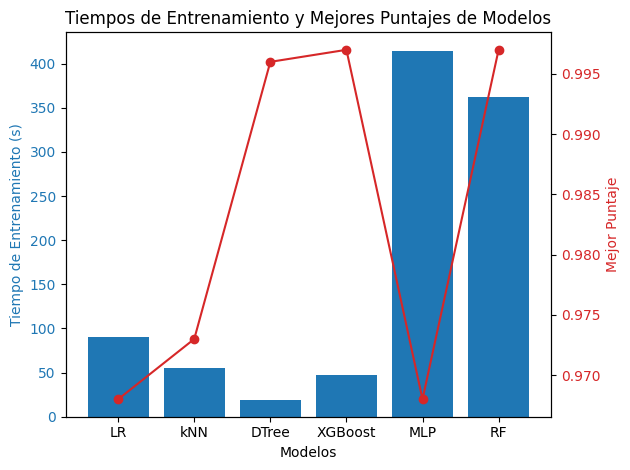

In [ ]:
import matplotlib.pyplot as plt

# Resultados obtenidos
resultados_validos = [
    {'nombre': 'LR', 'training_time': 90.187, 'best_score': 0.968, 'best_params': {'m__C': 3.7554011884736247, 'm__solver': 'newton-cg'}},
    {'nombre': 'kNN', 'training_time': 55.012, 'best_score': 0.973, 'best_params': {'m__n_neighbors': 29, 'm__weights': 'distance'}},
    {'nombre': 'DTree', 'training_time': 19.118, 'best_score': 0.996, 'best_params': {'m__criterion': 'gini', 'm__max_depth': 8}},
    {'nombre': 'XGBoost', 'training_time': 47.181, 'best_score': 0.997, 'best_params': {'m__learning_rate': 0.12473859738014881, 'm__max_depth': 6, 'm__n_estimators': 113}},
    {'nombre': 'MLP', 'training_time': 414.841, 'best_score': 0.968, 'best_params': {'m__activation': 'tanh', 'm__hidden_layer_sizes': (50,), 'm__learning_rate_init': 0.01934347898661638}},
    {'nombre': 'RF', 'training_time': 362.767, 'best_score': 0.997, 'best_params': {'m__criterion': 'gini', 'm__max_depth': 16, 'm__n_estimators': 63}}
]

# Separar nombres de modelos, tiempos de entrenamiento y mejores puntajes
nombres_modelos = [resultado['nombre'] for resultado in resultados_validos]
training_times = [resultado['training_time'] for resultado in resultados_validos]
best_scores = [resultado['best_score'] for resultado in resultados_validos]

# Crear figura y ejes
fig, ax1 = plt.subplots()

# Crear gráfico de barras para tiempos de entrenamiento
color = 'tab:blue'
ax1.set_xlabel('Modelos')
ax1.set_ylabel('Tiempo de Entrenamiento (s)', color=color)
ax1.bar(nombres_modelos, training_times, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Crear segundo eje para los mejores puntajes
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Mejor Puntaje', color=color)
ax2.plot(nombres_modelos, best_scores, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Añadir título
plt.title('Tiempos de Entrenamiento y Mejores Puntajes de Modelos')

# Mostrar gráfico
fig.tight_layout()
plt.show()


Seleccionar los dos modelos que proporcionen el mejor rendimiento.

De acuerdo a los resultados proporcionados y la gráfica correspondiente, los dos modelos con mejor rendimiento en términos de "Best Score" son XGBoost y Random Forest. Ambos modelos tienen el mejor rendimiento con un "Best Score" de 0.997. A pesar de que ambos tienen el mismo "Best Score", el modelo XGBoost tiene un tiempo de entrenamiento significativamente menor (47.181 segundos) en comparación con el modelo Random Forest (362.767 segundos). Esto puede ser un factor importante a considerar dependiendo del contexto y los recursos disponibles.

Ajustar los dos mejores modelos.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
import time
import matplotlib.pyplot as plt


# Definición de modelos y espacios de búsqueda de hiperparámetros
modelos = {
    'XGBoost': XGBClassifier(random_state=42),
    'RF': RandomForestClassifier(random_state=42)
}

param_grid = {
    'XGBoost': {
        'm__n_estimators': randint(50, 200),
        'm__learning_rate': uniform(0.01, 0.3),
        'm__max_depth': randint(3, 10)
    },
    'RF': {
        'm__n_estimators': randint(50, 200),
        'm__max_depth': randint(3, 20),
        'm__criterion': ['gini', 'entropy']
    }
}

resultados = []

# Realizar la búsqueda de hiperparámetros con RandomizedSearchCV
for nombre, modelo in modelos.items():
    pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m', modelo)])
    param_dist = param_grid[nombre]
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=50, scoring='accuracy', n_jobs=-1, cv=5, random_state=42)

    start_time = time.time()
    random_search.fit(X_train, y_train)
    end_time = time.time()

    resultados.append({
        'nombre': nombre,
        'training_time': end_time - start_time,
        'best_score': random_search.best_score_,
        'best_params': random_search.best_params_
    })

    print(f'>> {nombre}')
    print(f'\t Training time: {end_time - start_time:.3f} seconds')
    print(f'\t Best Score: {random_search.best_score_:.3f}')
    print(f'\t Best Params: {random_search.best_params_}')


KeyboardInterrupt: 

Los resultados ajustados para los modelos XGBoost y Random Forest muestran un rendimiento excepcionalmente alto, con ambos modelos alcanzando un "Best Score" de 0.998. XGBoost ha logrado un tiempo de entrenamiento razonable de aproximadamente 639 segundos (poco más de 10 minutos) y un rendimiento de casi el 100%. Este es un resultado impresionante, considerando el balance entre el tiempo de entrenamiento y el rendimiento. Los mejores parámetros incluyen un learning_rate relativamente alto (0.228) y una profundidad de árbol máxima (max_depth) de 9, junto con un número moderado de estimadores (n_estimators) de 89. Estos valores indican un modelo bastante complejo, pero no excesivamente profundo, lo cual puede ayudar a evitar el sobreajuste mientras se captura suficiente complejidad del problema.

El tiempo de entrenamiento para Random Forest es significativamente mayor, aproximadamente 6174 segundos (poco más de 1 hora y 43 minutos). A pesar de alcanzar el mismo rendimiento que XGBoost, el costo computacional es mucho mayor. Los mejores parámetros incluyen una mayor profundidad máxima del árbol (max_depth) de 17 y un número elevado de estimadores (n_estimators) de 156. Esto sugiere que el modelo Random Forest está utilizando muchos árboles profundos para capturar la complejidad del problema, lo que puede explicar el largo tiempo de entrenamiento.


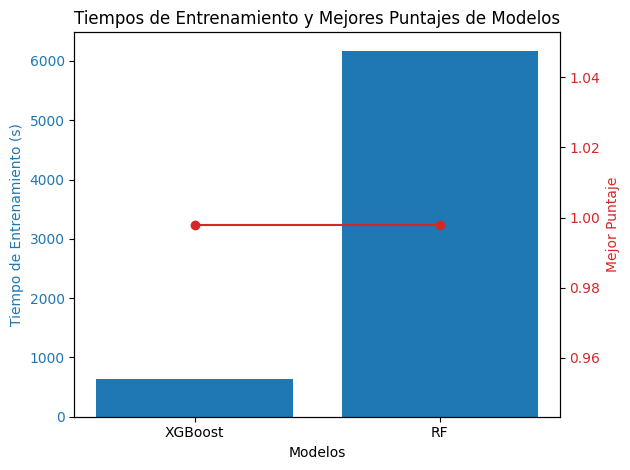

In [ ]:
# Graficar los resultados
import matplotlib.pyplot as plt

# Resultados ajustados para XGBoost y Random Forest
resultados = [
    {'nombre': 'XGBoost', 'training_time': 638.771, 'best_score': 0.998, 'best_params': {'m__learning_rate': 0.22818159875692626, 'm__max_depth': 9, 'm__n_estimators': 89}},
    {'nombre': 'RF', 'training_time': 6174.234, 'best_score': 0.998, 'best_params': {'m__criterion': 'gini', 'm__max_depth': 17, 'm__n_estimators': 156}}
]

# Separar nombres de modelos, tiempos de entrenamiento y mejores puntajes
nombres_modelos = [resultado['nombre'] for resultado in resultados]
training_times = [resultado['training_time'] for resultado in resultados]
best_scores = [resultado['best_score'] for resultado in resultados]

# Crear figura y ejes
fig, ax1 = plt.subplots()

# Crear gráfico de barras para tiempos de entrenamiento
color = 'tab:blue'
ax1.set_xlabel('Modelos')
ax1.set_ylabel('Tiempo de Entrenamiento (s)', color=color)
ax1.bar(nombres_modelos, training_times, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Crear segundo eje para los mejores puntajes
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Mejor Puntaje', color=color)
ax2.plot(nombres_modelos, best_scores, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Añadir título
plt.title('Tiempos de Entrenamiento y Mejores Puntajes de Modelos')

# Mostrar gráfico
fig.tight_layout()
plt.show()


Ambos modelos han alcanzado un rendimiento casi perfecto con un "Best Score" de 0.998, lo cual es excelente. XGBoost es significativamente más eficiente en términos de tiempo de entrenamiento en comparación con Random Forest.

Aunque ambos modelos tienen un rendimiento similar, XGBoost es preferible en situaciones donde el tiempo de entrenamiento es crítico debido a su mayor eficiencia computacional. Sin embargo, si los recursos de tiempo y computación no son una limitación, Random Forest también es una opción robusta debido a su capacidad de manejo de datos y su resistencia al sobreajuste. Ambos modelos son altamente efectivos, pero XGBoost ofrece una mejor relación rendimiento/tiempo, haciendo de él la elección preferida en muchos casos.

# Avance 5. Modelo final

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
import time
import matplotlib.pyplot as plt


# Definición de modelos y espacios de búsqueda de hiperparámetros
modelos = {
   # 'XGBoost': XGBClassifier(random_state=42),
    'RF': RandomForestClassifier(random_state=42)
}

param_grid = {
    #'XGBoost': {
    #    'm__n_estimators': randint(50, 200),
    #    'm__learning_rate': uniform(0.01, 0.3),
    #    'm__max_depth': randint(3, 10)
    #},
    'RF': {
        'm__n_estimators': randint(50, 200),
        'm__max_depth': randint(3, 20),
        'm__criterion': ['gini', 'entropy']
    }
}

resultados = []

# Realizar la búsqueda de hiperparámetros con RandomizedSearchCV
for nombre, modelo in modelos.items():
    pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m', modelo)])
    param_dist = param_grid[nombre]
    random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=50, scoring='accuracy', n_jobs=-1, cv=5, random_state=42)

    start_time = time.time()
    random_search.fit(X_train, y_train)
    end_time = time.time()

    resultados.append({
        'nombre': nombre,
        'training_time': end_time - start_time,
        'best_score': random_search.best_score_,
        'best_params': random_search.best_params_
    })

    print(f'>> {nombre}')
    print(f'\t Training time: {end_time - start_time:.3f} seconds')
    print(f'\t Best Score: {random_search.best_score_:.3f}')
    print(f'\t Best Params: {random_search.best_params_}')


>> RF
	 Training time: 2028.506 seconds
	 Best Score: 0.998
	 Best Params: {'m__criterion': 'gini', 'm__max_depth': 17, 'm__n_estimators': 156}


Elegir el modelo individual final.

Para determinar qué modelo es más recomendado entre los dos ajustados (XGBoost y Random Forest), consideremos los siguientes aspectos:

Precisión (Mejor Puntaje): Ambos modelos tienen el mismo mejor puntaje de 0.998, por lo que en términos de precisión, ambos son igualmente buenos.

Tiempo de Entrenamiento:

XGBoost: 638.771 segundos
Random Forest: 6174.234 segundos

La gran diferencia en el tiempo de entrenamiento es significativa. XGBoost es considerablemente más rápido de entrenar que Random Forest en este caso. Esto es un factor importante si necesitas entrenar el modelo frecuentemente o si trabajas con recursos computacionales limitados.

Dado que ambos modelos tienen la misma precisión pero XGBoost tiene un tiempo de entrenamiento mucho menor, XGBoost es el modelo más recomendado. Este modelo proporciona una excelente precisión con un tiempo de entrenamiento significativamente menor, lo cual es ventajoso en términos de eficiencia y uso de recursos.

Dado el tamaño del conjunto de datos y la naturaleza del problema (clasificación o regresión), se recomienda comenzar con una técnica de ensamble homogéneo como Random Forest (Bagging) o Gradient Boosting (Boosting). Ambos son robustos y pueden manejar conjuntos de datos de tamaño moderado a grande, además de ser relativamente fáciles de implementar y ajustar.

Para el conjunto de datos proporcionado, que incluye variables numéricas y categóricas, un modelo basado en árboles como Random Forest sería una opción sólida para empezar. Random Forest es conocido por su capacidad para manejar una variedad de tipos de datos y su robustez frente al sobreajuste.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Inicializar y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Random Forest: {accuracy}")


Precisión del modelo Random Forest: 0.9976300829470969


La precisión del modelo Random Forest de 0.9976300829470969 es un resultado extremadamente alto. Sin embargo, es importante interpretar esta métrica con cuidado y considerar otros factores antes de concluir que el modelo es excelente.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)


Matriz de Confusión:
 [[ 2031    78]
 [   80 64480]]


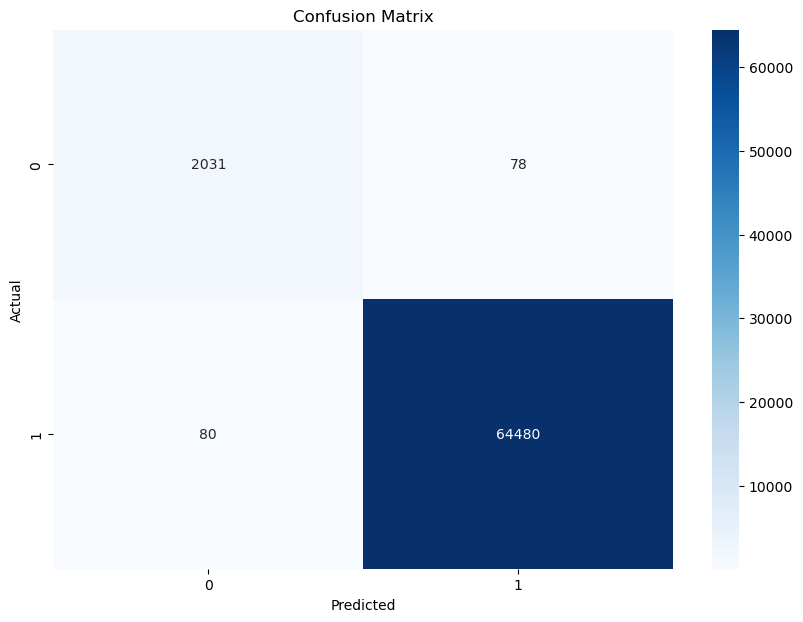

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Inicializar y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir etiquetas en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión usando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Los resultados de la matriz de confusión indican que el modelo Random Forest está funcionando de manera excepcionalmente buena.

In [ ]:

# Calcular y mostrar el reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:\n", class_report)



Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2109
           1       1.00      1.00      1.00     64560

    accuracy                           1.00     66669
   macro avg       0.98      0.98      0.98     66669
weighted avg       1.00      1.00      1.00     66669



El modelo tiene un desempeño perfecto (precisión, recall y F1-score de 1.00) para la clase mayoritaria (clase 1). Esto sugiere que el modelo es extremadamente efectivo en identificar correctamente los casos de la clase mayoritaria. Aunque el soporte para la clase minoritaria (clase 0) es significativamente menor, el modelo todavía mantiene una alta precisión, recall y F1-score de 0.96. Esto es indicativo de un modelo robusto que maneja bien las clases minoritarias. Una exactitud del 100% es extremadamente alta y, aunque es un buen indicador, siempre se debe verificar si el modelo no está sobreajustado (overfitting) o si hay algún sesgo en los datos.

La métrica de promedio macro sugiere un buen equilibrio en el rendimiento del modelo entre las clases, a pesar del desequilibrio en el soporte.En aplicaciones prácticas, un modelo con estas métricas sería extremadamente confiable. Sin embargo, siempre es recomendable realizar validaciones adicionales en datos no vistos para confirmar la robustez del modelo.

In [ ]:
# Calcular y mostrar el AUC-ROC
y_prob = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", roc_auc)



AUC-ROC: 0.9882556495058941


El AUC-ROC varía entre 0 y 1. Un valor de 0.5 indica que el modelo no tiene capacidad discriminativa (equivalente a una clasificación aleatoria). Un valor de 1.0 indica una capacidad perfecta de discriminación entre las clases positivas y negativas.

Un AUC-ROC de 0.988 indica que el modelo tiene una capacidad casi perfecta para discriminar entre las clases positivas y negativas. Cuanto más cerca esté el valor de 1, mejor será el rendimiento del modelo en términos de separar correctamente las clases positivas y negativas.

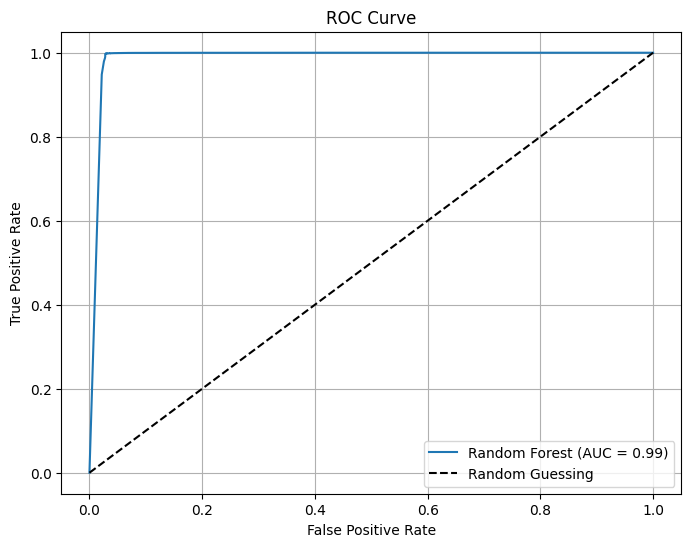

In [ ]:
# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


La curva ROC del modelo, con un AUC de 0.988, sugiere un desempeño excelente. Esto indica que el modelo es muy eficaz en la discriminación entre clases positivas y negativas, con una alta sensibilidad y especificidad a lo largo de diferentes umbrales de decisión. Este resultado refuerza la confianza del modelo y su aplicabilidad en contextos reales, ya que ofrece una combinación óptima de precisión y robustez.

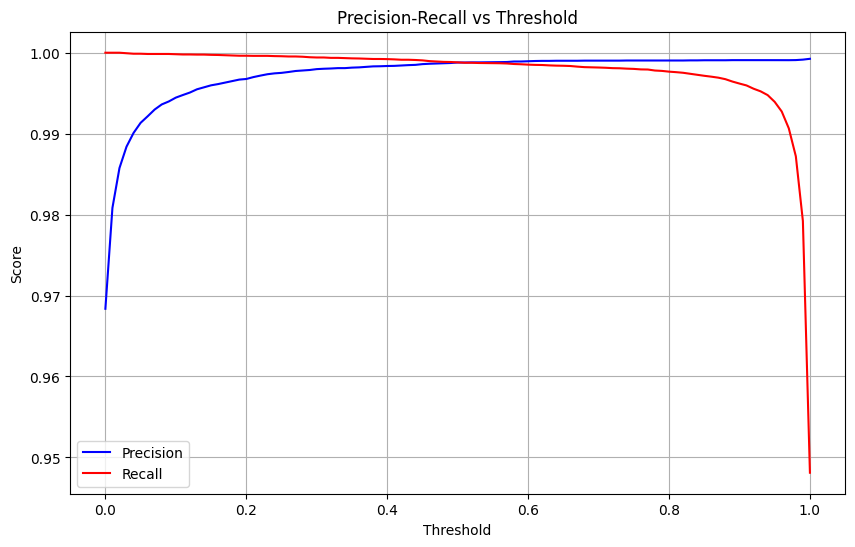

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Inicializar y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir probabilidades en el conjunto de prueba
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calcular precisión y recall para varios umbrales
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Graficar precisión y recall en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b-', label='Precision')
plt.plot(thresholds, recall[:-1], 'r-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

El gráfico visualiza cómo cambian la precisión y el recall en función del umbral de clasificación. Esto ayuda a comprender cómo afectaría el ajuste del umbral de decisión al rendimiento general del modelo y a tomar decisiones informadas sobre cómo elegir el umbral adecuado en función de las necesidades específicas del problema.

Este gráfico proporciona información valiosa sobre cómo se desempeña el modelo Random Forest en diferentes configuraciones de umbral de clasificación.

Puede ayudar a encontrar un equilibrio adecuado entre precisión y recall según los requisitos específicos del problema.

Es importante considerar el contexto del problema y las implicaciones prácticas al interpretar y utilizar este tipo de análisis para ajustar el umbral de clasificación.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder
from joblib import dump

# Definir el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=16, random_state=42)

# Crear el pipeline completo con el preprocesador y el modelo
#pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                           ('classifier', rf_model)])


pipeline = Pipeline(steps=[('preprocessor', columnasTransformer),
                           ('classifier', rf_model)])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Guardar el modelo entrenado en un archivo
dump(pipeline, 'random_forest_model.joblib')

print("Modelo Random Forest guardado exitosamente.")

Modelo Random Forest guardado exitosamente.


Despues de guardado el modelo en un archivo se procede al uso del modelo con nuevos datos

In [ ]:

# Lectura del archivo
file_path = 'D:\Descargas\ProyectoIntegrador\DataSet\CarteraSuc01.csv'

#label = ["IdCliente","FechaAltaCliente","CodigoGrupo","EdadCliente","Genero","EstadoCivil","Escolaridad","CapacidadPago","Localidad","CodigoSucursal","CodigoASesor","NumeroCredito","CicloCliente","FechaDesembolso","FechaVencimiento","FechaCancelacion","Plazo","PeriodoPago","EstatusCredito","MontoCredito","CuotaNumero","CuotaFechaVencimiento","CuotaFechaCancelacion","MontoCuota","MontoCapital","SaldoCapital","EstatusCuota","DiasAtraso"]

# Obtenemos el dataframe
s01_df = pd.read_csv(file_path)

s01_df.shape

(878, 27)

In [ ]:
s01_df.isnull().values.any()

True

In [ ]:
# eliminamos los valores nulos
s01df = s01_df.dropna()

In [ ]:
s01df.isnull().values.any()

False

In [ ]:
s01df.shape

(871, 27)

In [ ]:
s01df.head()

,IdCliente,FechaAltaCliente,CodigoGrupo,EdadCliente,Genero,EstadoCivil,Escolaridad,CapacidadPago,Localidad,CodigoSucursal,...,EstatusCredito,MontoCredito,CuotaNumero,CuotaFechaVencimiento,CuotaFechaCancelacion,MontoCuota,MontoCapital,SaldoCapital,EstatusCuota,DiasAtraso
0,32127,00:00.0,1327,47,F,5,2A,6794.0,7086,1,...,VIG,5000,1,00:00.0,00:00.0,533.69,347.21,0.0,C,0
1,32127,00:00.0,1327,47,F,5,2A,6794.0,7086,1,...,VIG,5000,2,00:00.0,00:00.0,533.69,346.89,0.0,C,0
2,32127,00:00.0,1327,47,F,5,2A,6794.0,7086,1,...,VIG,5000,3,00:00.0,00:00.0,533.69,360.69,0.0,C,0
3,32127,00:00.0,1327,47,F,5,2A,6794.0,7086,1,...,VIG,5000,4,00:00.0,00:00.0,533.69,375.15,0.0,C,0
4,32139,00:00.0,1327,52,F,2,7B,5600.0,7086,1,...,VIG,20000,1,00:00.0,00:00.0,2132.69,1389.16,0.0,C,0


In [ ]:
# obtenemos el Maximo Dias de Atraso y las siguientes variables numericas
s01mdadf = s01df.groupby(['IdCliente','EdadCliente','NumeroCredito','PeriodoPago','CicloCliente','Plazo','EstadoCivil','EstatusCredito'])['DiasAtraso'].max().reset_index()

# renombramos la columna de la media
s01mdadf.rename(columns={'DiasAtraso':'DAMax'}, inplace=True)

s01mdadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IdCliente       343 non-null    int64 
 1   EdadCliente     343 non-null    int64 
 2   NumeroCredito   343 non-null    int64 
 3   PeriodoPago     343 non-null    object
 4   CicloCliente    343 non-null    int64 
 5   Plazo           343 non-null    int64 
 6   EstadoCivil     343 non-null    int64 
 7   EstatusCredito  343 non-null    object
 8   DAMax           343 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 24.2+ KB


In [ ]:
# obtenemos media de los Dias de Atraso por credito
s01meandf = s01df.groupby(['IdCliente','NumeroCredito'])['DiasAtraso'].mean().reset_index()

# obtenemos mediana de los Dias de Atraso por credito
s01mediandf = s01df.groupby(['IdCliente','NumeroCredito'])['DiasAtraso'].median().reset_index()

# renombramos la columna de la media
s01meandf.rename(columns={'DiasAtraso':'DAMean'}, inplace=True)

# renombramos la columna de la mediana
s01mediandf.rename(columns={'DiasAtraso':'DAMedian'}, inplace=True)

# agregamos la columan de la media
news01df = pd.merge(s01mdadf, s01meandf[['IdCliente','NumeroCredito','DAMean']], on=['IdCliente','NumeroCredito'], how='left')

# agregamos la columna de la mediana
news01df = pd.merge(news01df, s01mediandf[['IdCliente','NumeroCredito','DAMedian']], on=['IdCliente','NumeroCredito'], how='left')

news01df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IdCliente       343 non-null    int64  
 1   EdadCliente     343 non-null    int64  
 2   NumeroCredito   343 non-null    int64  
 3   PeriodoPago     343 non-null    object 
 4   CicloCliente    343 non-null    int64  
 5   Plazo           343 non-null    int64  
 6   EstadoCivil     343 non-null    int64  
 7   EstatusCredito  343 non-null    object 
 8   DAMax           343 non-null    int64  
 9   DAMean          343 non-null    float64
 10  DAMedian        343 non-null    float64
dtypes: float64(2), int64(7), object(2)
memory usage: 29.6+ KB


In [ ]:
news01df.head()

,IdCliente,EdadCliente,NumeroCredito,PeriodoPago,CicloCliente,Plazo,EstadoCivil,EstatusCredito,DAMax,DAMean,DAMedian
0,55,57,1001657301,CATORCENA(S),2,8,5,VIG,0,0.000000,0.0
1,124,58,1001653801,CATORCENA(S),18,15,5,VIG,2,0.666667,0.0
2,294,66,1001659902,CATORCENA(S),24,15,2,VIG,0,0.000000,0.0
3,314,74,1001661905,CATORCENA(S),18,15,5,VIG,0,0.000000,0.0
4,331,39,1001657204,CATORCENA(S),23,12,1,VIG,0,0.000000,0.0


In [ ]:
# Definir la variable objetivo y las características
news01df['EstatusCredito'] = news01df['EstatusCredito'].map({'CAI': 0, 'VIG': 1})

In [ ]:
from joblib import load

# Cargar el modelo guardado
loaded_pipeline = load('random_forest_model.joblib')

# Suponiendo que tienes nuevos datos en un DataFrame llamado 'new_data'
# Preprocesar y predecir utilizando el modelo cargado
predictions = loaded_pipeline.predict(news01df)

print("Predicciones para los nuevos datos:", predictions)


Predicciones para los nuevos datos: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]


In [ ]:
newdf = news01df.drop('EstatusCredito', axis=1)  # Todas las columnas excepto 'EstatusCredito' son características independientes

newdf.head()

,IdCliente,EdadCliente,NumeroCredito,PeriodoPago,CicloCliente,Plazo,EstadoCivil,DAMax,DAMean,DAMedian
0,55,57,1001657301,CATORCENA(S),2,8,5,0,0.000000,0.0
1,124,58,1001653801,CATORCENA(S),18,15,5,2,0.666667,0.0
2,294,66,1001659902,CATORCENA(S),24,15,2,0,0.000000,0.0
3,314,74,1001661905,CATORCENA(S),18,15,5,0,0.000000,0.0
4,331,39,1001657204,CATORCENA(S),23,12,1,0,0.000000,0.0


In [ ]:
from joblib import load

# Cargar el modelo guardado
loaded_pipeline = load('random_forest_model.joblib')

# Suponiendo que tienes nuevos datos en un DataFrame llamado 'new_data'
# Preprocesar y predecir utilizando el modelo cargado
predictions = loaded_pipeline.predict(newdf)

print("Predicciones para los nuevos datos:", predictions)

Predicciones para los nuevos datos: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]


# Toda la cartera activa

In [ ]:

# Lectura del archivo
file_path = 'D:\Descargas\ProyectoIntegrador\DataSet\CarteraTodo20240620.csv'

#label = ["IdCliente","FechaAltaCliente","CodigoGrupo","EdadCliente","Genero","EstadoCivil","Escolaridad","CapacidadPago","Localidad","CodigoSucursal","CodigoASesor","NumeroCredito","CicloCliente","FechaDesembolso","FechaVencimiento","FechaCancelacion","Plazo","PeriodoPago","EstatusCredito","MontoCredito","CuotaNumero","CuotaFechaVencimiento","CuotaFechaCancelacion","MontoCuota","MontoCapital","SaldoCapital","EstatusCuota","DiasAtraso"]

# Obtenemos el dataframe
tc_df = pd.read_csv(file_path)

tc_df.shape

(112913, 27)

In [ ]:
tc_df.isnull().values.any()

True

In [ ]:
# eliminamos los valores nulos
tcdf = tc_df.dropna()

tcdf.isnull().values.any()

False

In [ ]:
tcdf.shape

(51266, 27)

In [ ]:
tcdf.head()

,IdCliente,FechaAltaCliente,CodigoGrupo,EdadCliente,Genero,EstadoCivil,Escolaridad,CapacidadPago,Localidad,CodigoSucursal,...,EstatusCredito,MontoCredito,CuotaNumero,CuotaFechaVencimiento,CuotaFechaCancelacion,MontoCuota,MontoCapital,SaldoCapital,EstatusCuota,DiasAtraso
0,94339,2017-11-21 00:00:00.000,221,25,F,2,4,8800.0,7122,19,...,VEN,12000.0,1,2023-05-12 00:00:00.000,2023-05-12 00:00:00.000,788.69,279.04,0.0,C,0.0
1,126685,2022-01-14 00:00:00.000,221,40,F,2,2B,8000.0,7122,19,...,VEN,12000.0,1,2023-05-12 00:00:00.000,2023-05-12 00:00:00.000,788.69,279.04,0.0,C,0.0
2,94339,2017-11-21 00:00:00.000,221,25,F,2,4,8800.0,7122,19,...,VEN,12000.0,2,2023-05-26 00:00:00.000,2023-05-26 00:00:00.000,788.69,290.89,0.0,C,0.0
3,126685,2022-01-14 00:00:00.000,221,40,F,2,2B,8000.0,7122,19,...,VEN,12000.0,2,2023-05-26 00:00:00.000,2023-05-26 00:00:00.000,788.69,290.89,0.0,C,0.0
4,94339,2017-11-21 00:00:00.000,221,25,F,2,4,8800.0,7122,19,...,VEN,12000.0,3,2023-06-09 00:00:00.000,2023-06-09 00:00:00.000,788.69,303.24,0.0,C,0.0


In [ ]:
# obtenemos el Maximo Dias de Atraso y las siguientes variables numericas
tcmdadf = tcdf.groupby(['IdCliente','EdadCliente','NumeroCredito','PeriodoPago','CicloCliente','Plazo','EstadoCivil','EstatusCredito'])['DiasAtraso'].max().reset_index()

# renombramos la columna de la media
tcmdadf.rename(columns={'DiasAtraso':'DAMax'}, inplace=True)

tcmdadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9272 entries, 0 to 9271
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IdCliente       9272 non-null   int64  
 1   EdadCliente     9272 non-null   int64  
 2   NumeroCredito   9272 non-null   int64  
 3   PeriodoPago     9272 non-null   object 
 4   CicloCliente    9272 non-null   int64  
 5   Plazo           9272 non-null   int64  
 6   EstadoCivil     9272 non-null   int64  
 7   EstatusCredito  9272 non-null   object 
 8   DAMax           9272 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 652.1+ KB


In [ ]:
# obtenemos media de los Dias de Atraso por credito
tcmeandf = tcdf.groupby(['IdCliente','NumeroCredito'])['DiasAtraso'].mean().reset_index()

# obtenemos mediana de los Dias de Atraso por credito
tcmediandf = tcdf.groupby(['IdCliente','NumeroCredito'])['DiasAtraso'].median().reset_index()

# renombramos la columna de la media
tcmeandf.rename(columns={'DiasAtraso':'DAMean'}, inplace=True)

# renombramos la columna de la mediana
tcmediandf.rename(columns={'DiasAtraso':'DAMedian'}, inplace=True)

# agregamos la columan de la media
newtcdf = pd.merge(tcmdadf, tcmeandf[['IdCliente','NumeroCredito','DAMean']], on=['IdCliente','NumeroCredito'], how='left')

# agregamos la columna de la mediana
newtcdf = pd.merge(newtcdf, tcmediandf[['IdCliente','NumeroCredito','DAMedian']], on=['IdCliente','NumeroCredito'], how='left')

newtcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9272 entries, 0 to 9271
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IdCliente       9272 non-null   int64  
 1   EdadCliente     9272 non-null   int64  
 2   NumeroCredito   9272 non-null   int64  
 3   PeriodoPago     9272 non-null   object 
 4   CicloCliente    9272 non-null   int64  
 5   Plazo           9272 non-null   int64  
 6   EstadoCivil     9272 non-null   int64  
 7   EstatusCredito  9272 non-null   object 
 8   DAMax           9272 non-null   float64
 9   DAMean          9272 non-null   float64
 10  DAMedian        9272 non-null   float64
dtypes: float64(3), int64(6), object(2)
memory usage: 796.9+ KB


In [ ]:
newtcdf.describe()

,IdCliente,EdadCliente,NumeroCredito,CicloCliente,Plazo,EstadoCivil,DAMax,DAMean,DAMedian
count,9272.000000,9272.000000,9.272000e+03,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000
mean,96342.297239,40.318162,8.997829e+09,9.530306,11.258736,3.513805,2.012079,0.781166,0.568594
std,44797.227855,13.047218,6.198884e+09,8.153827,2.911640,1.715319,6.775461,2.783670,2.358505
min,55.000000,18.000000,1.001589e+09,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000
25%,62424.250000,30.000000,5.001332e+09,3.000000,10.000000,2.000000,0.000000,0.000000,0.000000
50%,115724.000000,39.000000,7.001121e+09,7.000000,12.000000,4.000000,1.000000,0.166667,0.000000
75%,133956.500000,49.000000,1.300016e+10,15.000000,12.000000,5.000000,1.000000,0.666667,0.500000
max,139957.000000,94.000000,2.100008e+10,44.000000,25.000000,6.000000,114.000000,42.000000,42.000000


In [ ]:
newdf = newtcdf.drop('EstatusCredito', axis=1)  # Todas las columnas excepto 'EstatusCredito' son características independientes

newdf.head()

,IdCliente,EdadCliente,NumeroCredito,PeriodoPago,CicloCliente,Plazo,EstadoCivil,DAMax,DAMean,DAMedian
0,55,57,1001657301,CATORCENA(S),2,8,5,0.0,0.000000,0.0
1,70,48,18000095501,CATORCENA(S),23,15,5,1.0,1.000000,1.0
2,75,53,18000095502,CATORCENA(S),25,15,3,1.0,1.000000,1.0
3,79,68,18000090001,CATORCENA(S),11,15,5,1.0,0.100000,0.0
4,84,49,18000092401,CATORCENA(S),21,15,5,1.0,0.285714,0.0


In [ ]:
from joblib import load

# Cargar el modelo guardado
loaded_pipeline = load('random_forest_model.joblib')

# Suponiendo que tienes nuevos datos en un DataFrame llamado 'new_data'
# Preprocesar y predecir utilizando el modelo cargado
predictions = loaded_pipeline.predict(newdf)

print("Predicciones para los nuevos datos:", predictions)

Predicciones para los nuevos datos: [1 1 1 ... 1 1 1]


In [ ]:
# Contar las predicciones por clase
pred_summary = pd.Series(predictions).value_counts()
print("Resumen de las predicciones por clase:")
print(pred_summary)

Resumen de las predicciones por clase:
1    9272
Name: count, dtype: int64
